In [1]:
#import gc
#gc.collect()
import pandas as pd
import numpy as np
#from plotnine import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)
# https://www.cbsl.gov.lk/en/statistics/statistical-tables/external-sector
url_bop = 'C:/Users/Dimuthu/Downloads/table2.10_20220331_e.xlsx'


# Balance of Payments

In [2]:
xls = pd.ExcelFile(url_bop)
financial_account=pd.read_excel(url_bop, sheet_name=xls.sheet_names[1],skiprows=1)
financial_account = financial_account.dropna(how='all')
financial_account['variable'] = ''

In [3]:
for i in range(1,financial_account.shape[0]):
    for j in range(0,8):
        if(pd.isna(financial_account.iloc[i,j])):
            pass
        else:
            financial_account.variable.iloc[[i]] = financial_account.iloc[i,j]

<ipython-input-3-f418da91e463>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_account.variable.iloc[[i]] = financial_account.iloc[i,j]


In [4]:
financial_account.drop(columns=financial_account.columns[:8],axis=1,inplace=True)

In [5]:
row_names = financial_account.loc[0,:].values.tolist()

In [6]:
financial_account = financial_account.iloc[2:]
column_names = financial_account.variable.to_list()

In [7]:
financial_account.drop(['variable'],axis=1,inplace=True)
financial_account[financial_account.columns] = financial_account[financial_account.columns].apply(pd.to_numeric, errors='coerce')
financial_account.fillna(0,inplace=True)

<ipython-input-7-b6625f655d25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_account.drop(['variable'],axis=1,inplace=True)
<ipython-input-7-b6625f655d25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_account[financial_account.columns] = financial_account[financial_account.columns].apply(pd.to_numeric, errors='coerce')


In [8]:
for i in range(0,financial_account.shape[0]):
    for j in range(0,financial_account.shape[1],2):
        financial_account.iloc[i,j] = financial_account.iloc[i,j] - financial_account.iloc[i,j+1]


In [9]:
financial_account.drop(columns=financial_account.columns[range(1,financial_account.shape[1],2)],axis=1,inplace=True)

In [10]:
financial_account.reset_index(drop=True,inplace=True)
financial_account =financial_account.transpose()
financial_account.reset_index(drop=True,inplace=True)

In [11]:
column_names = [x.replace('[^a-zA-Z]',"") for x in column_names]
column_names = [x.replace(' ',"") for x in column_names]
column_names = [x.replace('-',"") for x in column_names]

for i in range(0,len(column_names)):
    column_names[i]=column_names[i]+str(i)

In [12]:
financial_account.columns = column_names

In [13]:
column_names = financial_account.columns[financial_account.sum()==0]
financial_account = financial_account.drop(columns=column_names,axis=1)

row_names = [x for x in row_names if str(x) != 'nan']
row_names = [x.replace(' ',"") for x in row_names]
row_names = [x for x in row_names if str(x) != '']
year_list = [int(x[:4]) for x in row_names]
month_list = [int(x[5:6])*3 for x in row_names]
date_list = [1]*len(month_list)

df = pd.DataFrame(list(zip(year_list, month_list,date_list)), columns =['Year', 'Month',"Day"])
df['date'] = pd.to_datetime(df[['Year','Month',"Day"]])
df.drop(columns=['Year','Month','Day'],axis=1,inplace=True)

financial_account = pd.concat([df.reset_index(drop=True), financial_account.reset_index(drop=True)], axis=1)

In [14]:
financial_account.columns

Index(['date', 'FinancialAccount0', 'DirectInvestments1',
       'Equityandinvestmentfundshares2',
       'Equityotherthanreinvestmentofearnings3',
       'Directinvestorindirectinvestmententerprise4', 'BOIcompanies5',
       'CSEcompanies(notregisteredwithBOI)6', 'Othercompanies7',
       'Reinvestmentofearnings8', '9', '10', 'DebtInstruments11',
       'Directinvestorindirectinvestmententerprise12', 'BOIcompanies13',
       'ShareholderAdvance14', 'IntraCompanyBorrowings15', 'DebtRepayments16',
       'CSEcompanies(notregisteredwithBOI)17', 'PortfolioInvestments19',
       'Equityandinvestmentfundshares20',
       'CSEcompanies(notregisteredwithBOI)21', 'Debtsecurities22',
       'Deposittakingcorporations,otherthanthecentralbank24', 'Longterm26',
       'GeneralGovernment27', 'Shortterm(TreasuryBills)28', 'Longterm29',
       'TreasuryBonds30', 'SLDBs31', 'SovereignBonds32',
       'Maturitiesofnonresidentholdings33',
       'Secondarymarkettransactionsbynonresidents34', 'OtherSecto

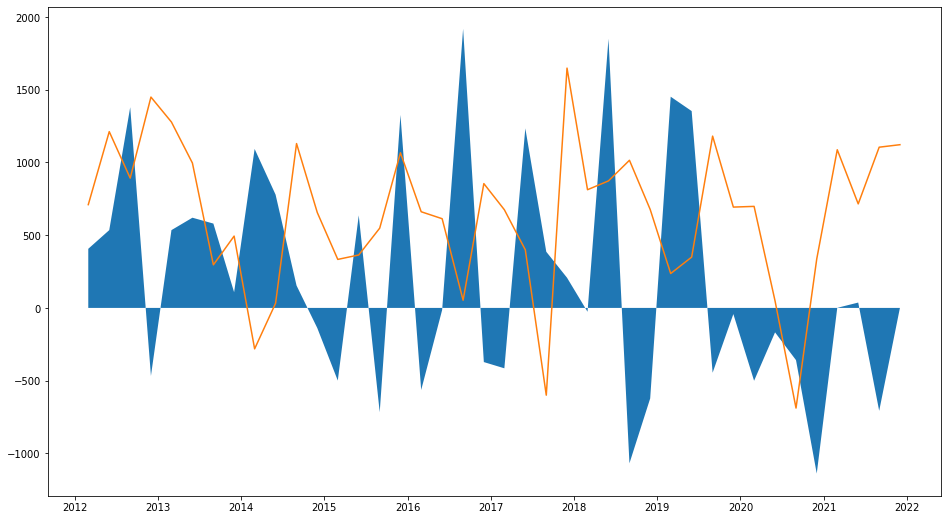

In [15]:
plt.stackplot(  financial_account['date'],
                financial_account['Debtsecurities22'].astype(float))
plt.plot(financial_account['date'],financial_account['FinancialAccount0'])
